#Hopping Window Mean Aggregation


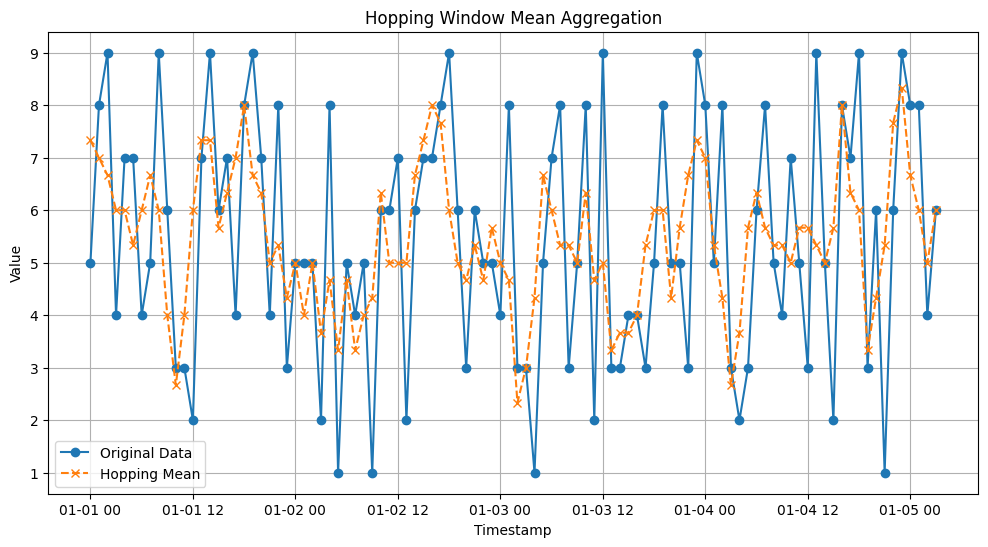

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample time series dataframe
data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=100, freq='h'),
    'value': np.random.randint(1, 10, 100)  # Random integer values between 1 and 10
}
df = pd.DataFrame(data)

# Define hopping window parameters
window_size = pd.Timedelta('3h')  # Window duration
hop_size = pd.Timedelta('1h')  # Hop interval

# Initialize result
results = []

# Apply hopping window aggregation
start_time = df['timestamp'].min()
end_time = df['timestamp'].max()

current_start = start_time
while current_start <= end_time:
    current_end = current_start + window_size
    window_data = df[(df['timestamp'] >= current_start) & (df['timestamp'] < current_end)]
    window_mean = window_data['value'].mean() if not window_data.empty else None
    results.append({'timestamp': current_start, 'hopping_mean': window_mean})
    current_start += hop_size

# Convert results to a DataFrame
hopping_df = pd.DataFrame(results)

# Merge the original data with the hopping means for visualization
merged_df = pd.merge_asof(df, hopping_df, on='timestamp', direction='backward')

# Plot the original data and hopping means
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Original Data', marker='o')
plt.plot(hopping_df['timestamp'], hopping_df['hopping_mean'], label='Hopping Mean', linestyle='--', marker='x')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Hopping Window Mean Aggregation')
plt.grid()
plt.show()
